<a href="https://colab.research.google.com/github/gaeun0915/gaeun0915/blob/main/%EC%A4%91%EA%B3%A0_%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EC%98%88%EC%A0%9C_220801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'gaeunlee915'
os.environ['KAGGLE_KEY'] = '5f6a651b8b1a4aaec05f8be2842abc2f'

In [4]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 93% 245M/262M [00:01<00:00, 225MB/s]
100% 262M/262M [00:01<00:00, 225MB/s]


In [5]:
!unzip '*.zip'

Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [6]:
df = pd.read_csv('/content/vehicles.csv')

id : 게시물 아이디 

url : 자동차를 판매하고 있는 웹 사이트

region :  해당 자동차를 관리하는 지역

region : 지역 홈페이지 주소

price : 중고차 (y) 

year : 생산연도

**anufacturer : 제조사**
model : 자동차 모델	
condition : 상태 **
cylinders : 기통수
feul : 연료 타입
odometer : 주행거리 

title_staus : 소유주 등록 상태

**transmission : 트랜스미션 종류**
vin : 차대 번호
**dr ive : 자동차 구동타입**

size : 자동차 크기

type : 자동차의 일반타입

**paint_color : 차 색깔	**

image_url : 이미지 url

description : 설명

state:거래가 업로드 된 주

lat :위도
long : 경도
posting_date : 포스팅 날짜

In [7]:
df.head()  

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [11]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [12]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [14]:
df.drop(['id','url','region_url','title_status','VIN','image_url','description','county','state','lat','long','posting_date'], axis=1, inplace=True)

In [16]:
df['age'] = 2021 - df['year']  #age라는 컬럼 추가
df.drop('year',axis = 1, inplace = True)
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['region'].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [157]:
df['manufacturer'].value_counts()

others       130418
ford          51944
chevrolet     40751
toyota        27307
honda         17669
nissan        15200
jeep          14569
gmc           11986
other         10527
Name: manufacturer, dtype: int64

In [21]:
len(df['manufacturer'].value_counts())

42

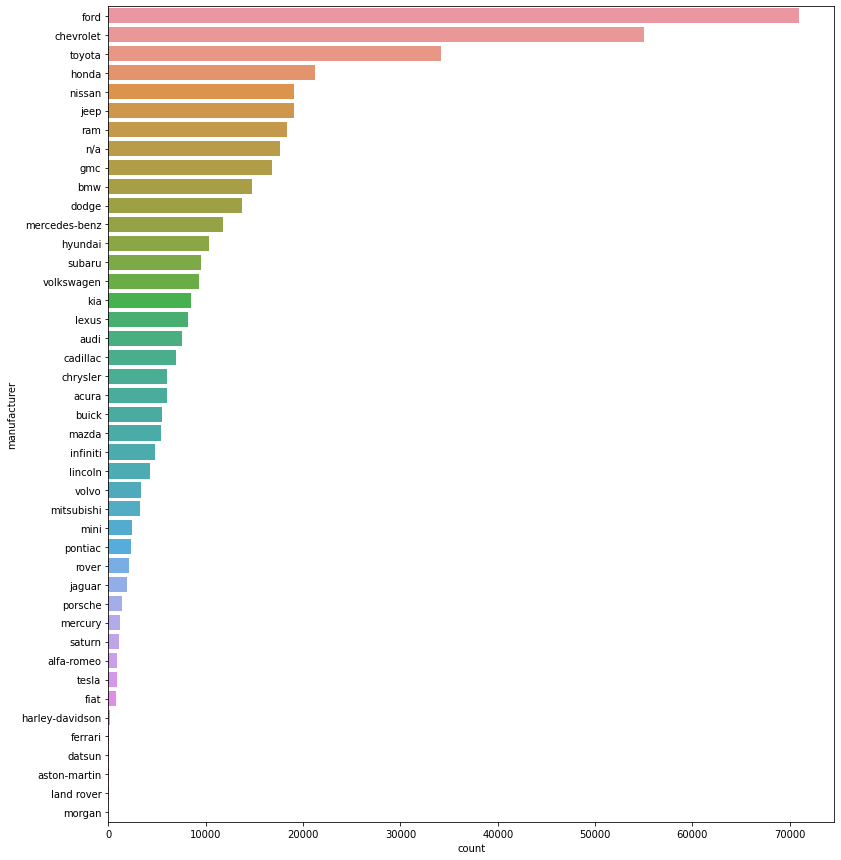

In [25]:
fig = plt.figure(figsize = (13,15))
sns.countplot(y='manufacturer',data=df.fillna('n/a'),
              order = df.fillna('n/a')['manufacturer'].value_counts().index)

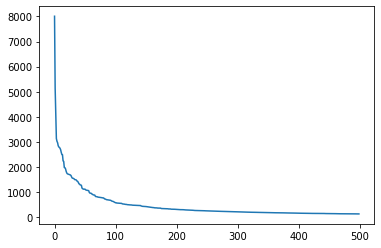

In [33]:
plt.plot(range(len(df['model'].value_counts()[:500])),df['model'].value_counts()[:500])

In [26]:
df['model'].value_counts()

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

In [28]:
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

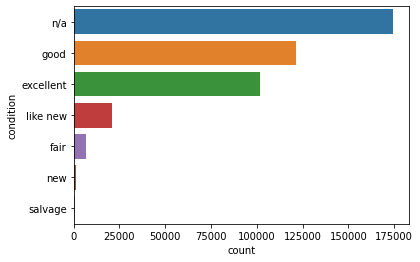

In [35]:
sns.countplot(y= 'condition',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['condition'].value_counts().index)  #condition을 시각화 n/a면 상태 안좋다는 것일듯 

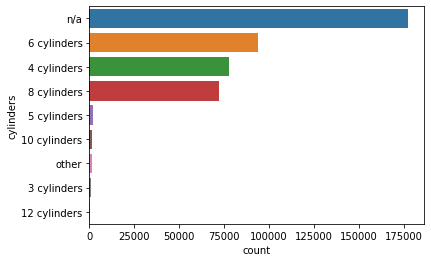

In [38]:
#자동차 기통수 시각화
sns.countplot(y= 'cylinders',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['cylinders'].value_counts().index)

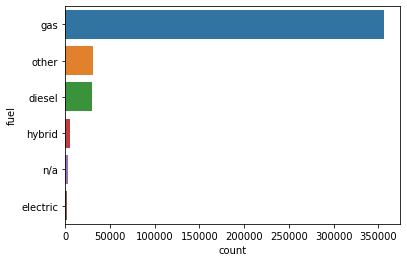

In [39]:
sns.countplot(y= 'fuel',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['fuel'].value_counts().index)

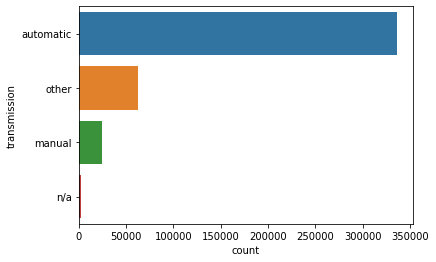

In [42]:
#트랜스미션 종류 타입 시각화
sns.countplot(y='transmission',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['transmission'].value_counts().index)

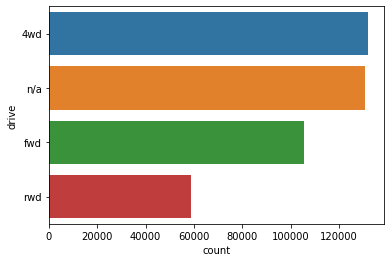

In [43]:
#자동차 구동타입 시각화
sns.countplot(y='drive',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['drive'].value_counts().index)

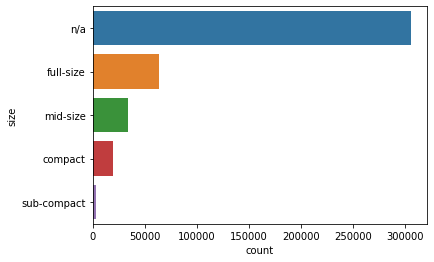

In [44]:
#자동차 크기 타입 시각화 - 
sns.countplot(y='size',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['size'].value_counts().index)

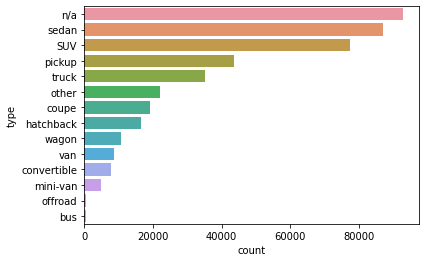

In [46]:
#자동차 type 타입 시각화  
sns.countplot(y='type',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['type'].value_counts().index)

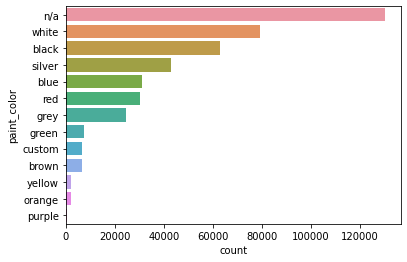

In [47]:
#자동차 color 타입 시각화  
sns.countplot(y='paint_color',
              data=df.fillna('n/a'),
              order=df.fillna('n/a')['paint_color'].value_counts().index)

In [49]:
#수치형 데이터의 통계 분석하기
df['price'].max()

3736928711

In [50]:
df['price'].min()

0

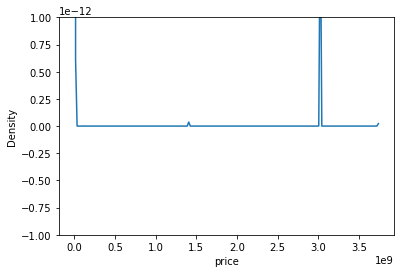

In [51]:
sns.kdeplot(x=df['price'])

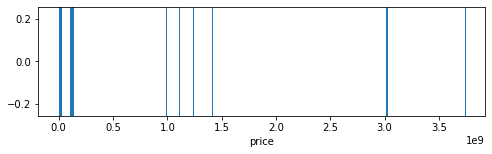

In [55]:
#수치형 데이터 값의 범위, 기초통계 분석하기
#rugplot : 실수 분포 플롯 자료의 분포를 묘사하기 위함
fig=plt.figure(figsize=(8,2))
sns.rugplot(x='price', data=df, height=1)

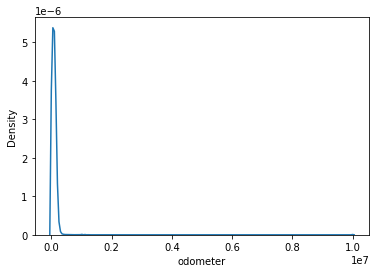

In [56]:
sns.kdeplot(x=df['odometer']) #주행기록

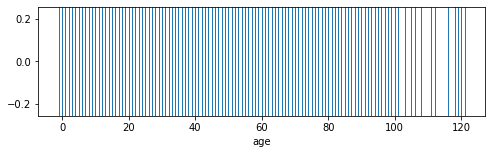

In [57]:
fig=plt.figure(figsize=(8,2))
sns.rugplot(x='age', data=df, height=1)

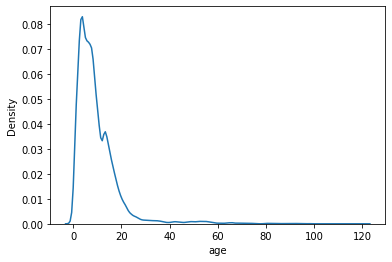

In [58]:
sns.kdeplot(x=df['age']) #커널밀도함수

In [59]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.1)
print(p1, p2)

44500.0 500.0


In [60]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

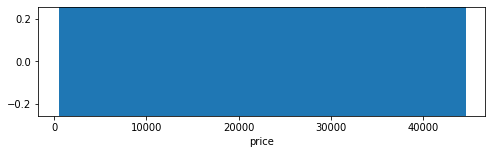

In [67]:
fig=plt.figure(figsize=(8,2))
sns.rugplot(x='price', data=df, height=1)

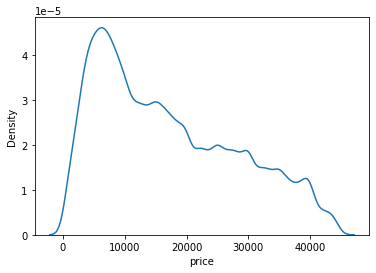

In [68]:
sns.kdeplot(x=df['price'])

In [70]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

280000.0 17273.0


In [72]:
df = df[(o1>df['odometer'] ) & (df['odometer'] > o2)]

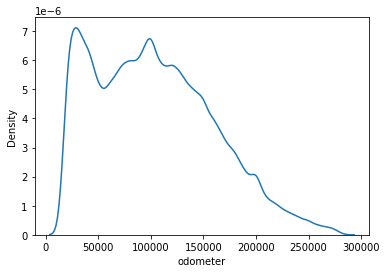

In [73]:
sns.kdeplot(x=df['odometer'])

In [74]:
df.isna().sum()

region               0
price                0
manufacturer     10946
model             3214
condition       121779
cylinders       123638
fuel              1942
odometer             0
transmission      1247
drive            95299
size            222903
type             70112
paint_color      92213
age                420
dtype: int64

In [75]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
27,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
28,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
29,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
30,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
31,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [ ]:
##범주형 데이터의 통계 분석하기

In [79]:
manu_count = df['manufacturer'].value_counts()
manu_count.sort_values(ascending = False, inplace=True)
manu_count

ford               51944
chevrolet          40751
toyota             27307
honda              17669
nissan             15200
jeep               14569
gmc                11986
bmw                11972
ram                11893
dodge               9941
mercedes-benz       8565
hyundai             8054
subaru              7814
volkswagen          7188
lexus               6715
kia                 6454
audi                6088
chrysler            5104
cadillac            5002
acura               4472
buick               4075
mazda               3899
infiniti            3780
lincoln             3137
volvo               2584
mitsubishi          2280
pontiac             2045
mini                1957
rover               1472
jaguar              1254
mercury             1018
saturn               993
porsche              970
fiat                 527
alfa-romeo           512
tesla                508
harley-davidson       70
datsun                56
land rover             9
ferrari                6


In [80]:
manu_idx = manu_count.index[7:]  #manu_count 를 7번째부터 끝까지 가져와서 인덱스 리스트로 넣어줌
manu_idx

Index(['bmw', 'ram', 'dodge', 'mercedes-benz', 'hyundai', 'subaru',
       'volkswagen', 'lexus', 'kia', 'audi', 'chrysler', 'cadillac', 'acura',
       'buick', 'mazda', 'infiniti', 'lincoln', 'volvo', 'mitsubishi',
       'pontiac', 'mini', 'rover', 'jaguar', 'mercury', 'saturn', 'porsche',
       'fiat', 'alfa-romeo', 'tesla', 'harley-davidson', 'datsun',
       'land rover', 'ferrari', 'aston-martin', 'morgan'],
      dtype='object')

In [81]:
df = df.reset_index()

In [82]:
df.head()

,index,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,27,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
1,28,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
2,29,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
3,30,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
4,31,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [84]:
del df['index']

In [85]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
1,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
2,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
3,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
4,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [88]:
df['manufacturer'].fillna('other',inplace=True ) # df['manufacturer']컬럼의 값이 manu_idx에 있는 데이터는
for num in range(len(df['manufacturer'])) : 
  if str(df.iloc[num]['manufacturer']) in manu_idx :
   df.at[num,'manufacturer'] = 'others'

In [158]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,auburn,33590.0,gmc,other,good,8 cylinders,gas,57923.0,other,other,other,pickup,white,7.0
1,auburn,22590.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,other,other,pickup,blue,11.0
2,auburn,39590.0,chevrolet,other,good,8 cylinders,gas,19160.0,other,other,other,pickup,red,1.0
3,auburn,30990.0,toyota,other,good,8 cylinders,gas,41124.0,other,other,other,pickup,red,4.0
4,auburn,15000.0,ford,other,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [89]:
df.isna().sum()

region               0
price                0
manufacturer         0
model             3214
condition       121779
cylinders       123638
fuel              1942
odometer             0
transmission      1247
drive            95299
size            222903
type             70112
paint_color      92213
age                420
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320402 entries, 0 to 298859
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        320371 non-null  object 
 1   price         320371 non-null  float64
 2   manufacturer  320371 non-null  object 
 3   model         320371 non-null  object 
 4   condition     320371 non-null  object 
 5   cylinders     320371 non-null  object 
 6   fuel          320371 non-null  object 
 7   odometer      320371 non-null  float64
 8   transmission  320371 non-null  object 
 9   drive         320371 non-null  object 
 10  size          320371 non-null  object 
 11  type          320402 non-null  object 
 12  paint_color   320371 non-null  object 
 13  age           320371 non-null  float64
dtypes: float64(3), object(11)
memory usage: 44.7+ MB


In [160]:
df['manufacturer'].value_counts()

others       130418
ford          51944
chevrolet     40751
toyota        27307
honda         17669
nissan        15200
jeep          14569
gmc           11986
other         10527
Name: manufacturer, dtype: int64

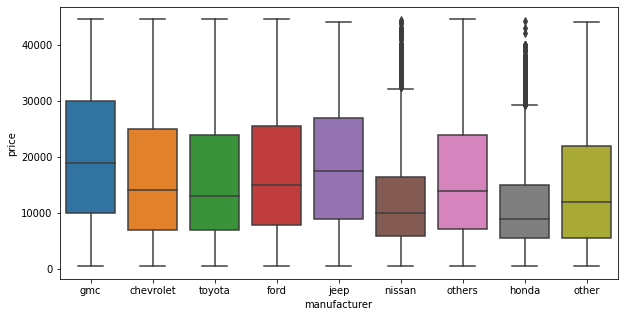

In [91]:
#boxplot 계열로 범주형 데이터를 시각화하여
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='manufacturer', y = 'price', data=df)

In [93]:
from tqdm.notebook import tqdm # tqdm상태바를 노트북에서 보여주는 것

model_count = df['model'].value_counts()
model_count.sort_values(ascending = False, inplace=True)
model_idx = model_count.index[14:]
df['model'].fillna('other',inplace=True) # df['model'] 에 있는 nan 값을 'other'로 변경
#df[model].컬럼의 값이 model_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['model']))) :
  if str(df.iloc[num]['model']) in model_idx :
    df.at[num,'model']= 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

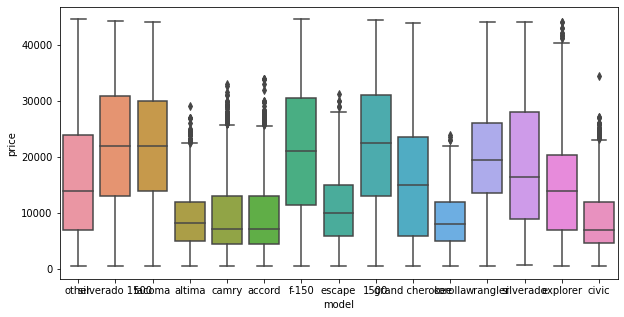

In [94]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='model', y = 'price', data=df)

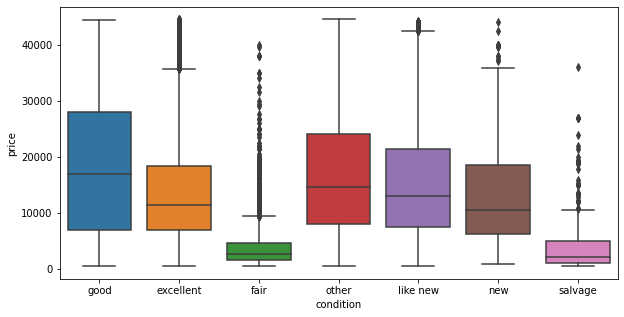

In [95]:
df['condition'].fillna('other',inplace=True)
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='condition', y = 'price', data=df)

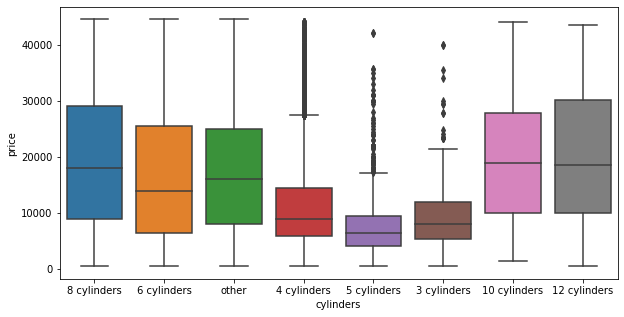

In [96]:
df['cylinders'].fillna('other',inplace=True)
fig = plt.figure(figsize=(10,5)) # boxplot 게열로 범주형 데이터를 시각화하여 분석하기 
sns.boxplot(x='cylinders', y = 'price', data=df)

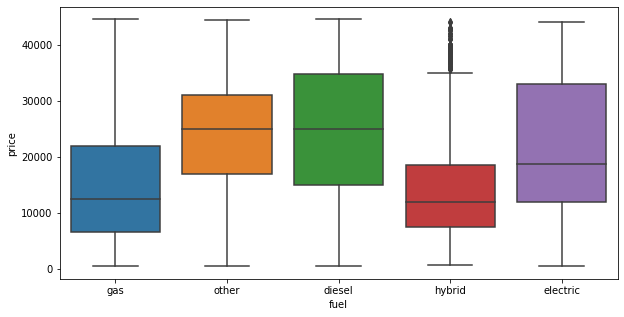

In [97]:
df['fuel'].fillna('other',inplace=True)  # other은 기타로 
fig = plt.figure(figsize=(10,5)) # boxplot 게열로 범주형 데이터를 시각화하여 분석하기 
sns.boxplot(x='fuel', y = 'price', data=df)              
#groupby 썼어야 good

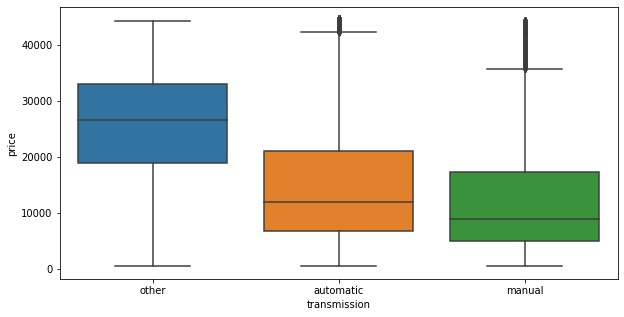

In [98]:
df['transmission'].fillna('other',inplace=True)
fig = plt.figure(figsize=(10,5)) # boxplot 게열로 범주형 데이터를 시각화하여 분석하기 
sns.boxplot(x='transmission', y = 'price', data=df)

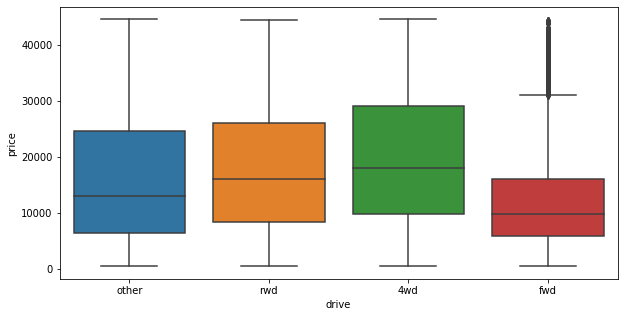

In [99]:
df['drive'].fillna('other',inplace=True)
fig = plt.figure(figsize=(10,5)) # boxplot 게열로 범주형 데이터를 시각화하여 분석하기 
sns.boxplot(x='drive', y = 'price', data=df)

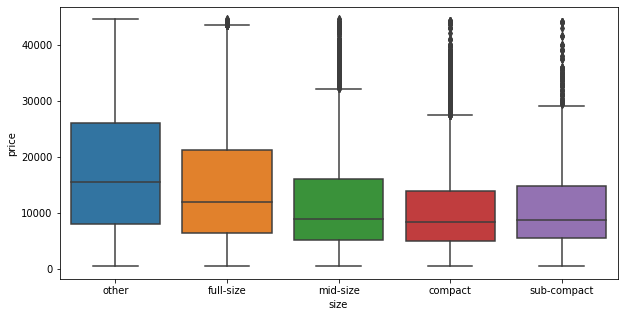

In [100]:
df['size'].fillna('other',inplace=True)
fig = plt.figure(figsize=(10,5)) # boxplot 게열로 범주형 데이터를 시각화하여 분석하기 
sns.boxplot(x='size', y = 'price', data=df)

In [161]:
from tqdm.notebook import tqdm # tqdm상태바를 노트북에서 보여주는 것

type_count = df['type'].value_counts()
type_count.sort_values(ascending = False, inplace=True)
type_idx = type_count.index[5:]
df['type'].fillna('other',inplace=True) # df['model'] 에 있는 nan 값을 'other'로 변경
#df[model].컬럼의 값이 model_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['type']))) :
  if str(df.iloc[num]['type']) in type_idx :
    df.at[num,'type']= 'other'

  0%|          | 0/320402 [00:00<?, ?it/s]

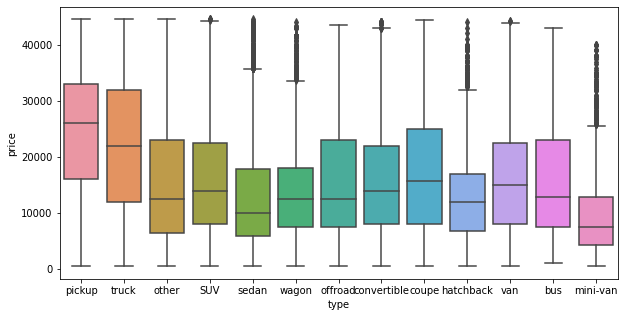

In [162]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='type', y = 'price', data=df)

In [106]:
from tqdm.notebook import tqdm # tqdm상태바를 노트북에서 보여주는 것

color_count= df['paint_color'].value_counts()
color_count.sort_values(ascending = False, inplace=True)
color_idx = color_count.index[7:]
df['paint_color'].fillna('other',inplace=True) # df['model'] 에 있는 nan 값을 'other'로 변경
#df[model].컬럼의 값이 model_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['paint_color']))) :
  if str(df.iloc[num]['paint_color']) in color_idx :
    df.at[num,'paint_color']= 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

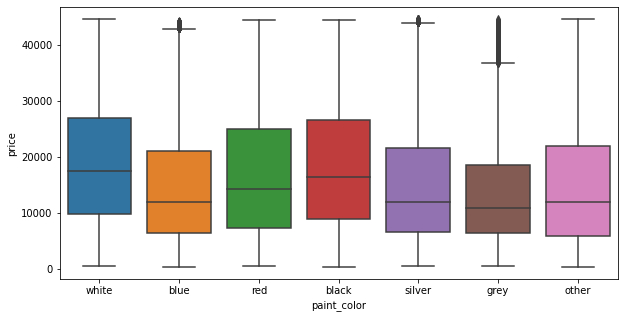

In [108]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='paint_color', y = 'price', data=df)

In [163]:
df.isna().sum()

region          61
price           61
manufacturer    61
model           61
condition       61
cylinders       61
fuel            61
odometer        61
transmission    61
drive           61
size            61
type             0
paint_color     61
age             61
dtype: int64

In [164]:
df.dropna(inplace=True) # age에 있는 nan을 삭제하기 위함

In [165]:
df.isna().sum()

region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
age             0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320371 entries, 0 to 320790
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        320371 non-null  object 
 1   price         320371 non-null  float64
 2   manufacturer  320371 non-null  object 
 3   model         320371 non-null  object 
 4   condition     320371 non-null  object 
 5   cylinders     320371 non-null  object 
 6   fuel          320371 non-null  object 
 7   odometer      320371 non-null  float64
 8   transmission  320371 non-null  object 
 9   drive         320371 non-null  object 
 10  size          320371 non-null  object 
 11  type          320371 non-null  object 
 12  paint_color   320371 non-null  object 
 13  age           320371 non-null  float64
dtypes: float64(3), object(11)
memory usage: 36.7+ MB


In [167]:
df.to_csv('./중고 차 가격 예측 .csv')

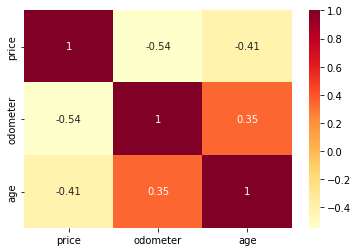

In [168]:
# 모델 학습을 위한 데이터 전처리
sns.heatmap(df.corr(),annot=True, cmap = 'YlOrRd')

In [169]:
df.describe()

,price,odometer,age
count,320371.000000,320371.000000,320371.000000
mean,16105.658817,103694.999922,10.483165
std,10781.490969,56493.209733,8.454060
min,501.000000,17275.000000,-1.000000
25%,6997.000000,56779.000000,5.000000
50%,13900.000000,99366.000000,8.000000
75%,23950.000000,142647.500000,13.000000
max,44499.000000,279974.000000,121.000000


In [170]:
from sklearn.preprocessing import StandardScaler

In [172]:
X_num = df[['odometer','age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index,
                        columns=X_num.columns)

In [175]:
X_scaled.head()

,odometer,age
0,-0.810223,-0.412012
1,-0.574689,0.061135
2,-1.496377,-1.121731
3,-1.107586,-0.766871
4,0.430229,-0.293725


In [176]:
#get.dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기 방향이 1로 
X_cat = df.drop(['price','odometer','age'],axis=1)
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_grey,paint_color_other,paint_color_red,paint_color_silver,paint_color_white
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [177]:
#입출력 데이터 통합하기
X = pd.concat([X_scaled,X_cat],axis=1)
y=df['price']

In [178]:
X.head()

,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,...,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_grey,paint_color_other,paint_color_red,paint_color_silver,paint_color_white
0,-0.810223,-0.412012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.574689,0.061135,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.496377,-1.121731,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.107586,-0.766871,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.430229,-0.293725,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [179]:
X.shape

(320371, 482)

In [180]:
## train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=1)

Step 5. Regression 모델 학습하기


LinearRegression 모델 학습하기

In [181]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [182]:
# LinearRegression 모델 생성/학습
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [183]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
lr_pred = lr_reg.predict(X_test)

In [184]:
print('MAE', mean_absolute_error(y_test, lr_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, lr_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, lr_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, lr_pred)) # R2 스코어

MAE 4982.317628131763
MSE 44445479.953280255
RMSE 6666.74432937699
R2 0.6177263621292377
